# figs_d25a.ipynb
Analyse high-end and low-end projections and produce figures.

Author: Benjamin S. Grandey.

In [1]:
import d25a
import datetime

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Print package versions
print(d25a.get_watermark())

Python implementation: CPython
Python version       : 3.10.16
IPython version      : 8.31.0

matplotlib: 3.10.0
numpy     : 2.2.1
pandas    : 2.2.3
seaborn   : 0.13.2
xarray    : 2024.11.0

conda environment: d25a-rsl-fusion

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



Written s01.pdf (0.02 MB)
Written s01.png (0.16 MB)


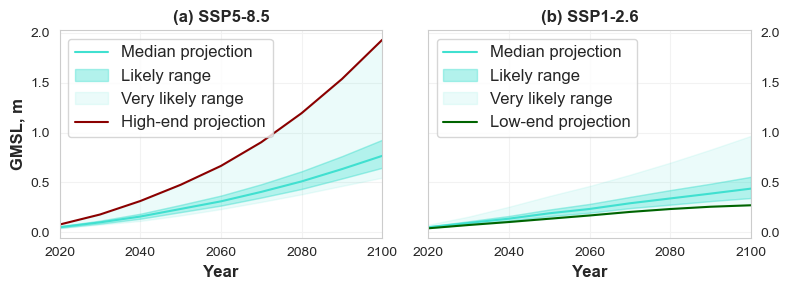

In [4]:
# Plot time series of GMSL
fig, axs = d25a.fig_fusion_timeseries(gauge=None)
_ = d25a.name_save_fig(fig, fso='s')

Written fig01.pdf (0.02 MB)
Written fig01.png (0.17 MB)


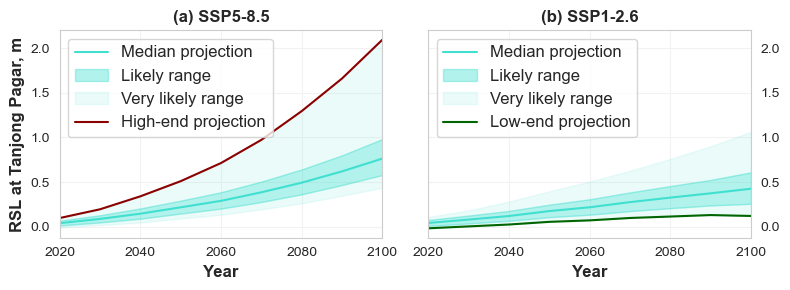

In [5]:
# Plot time series of RSL for Singapore
fig, axs = d25a.fig_fusion_timeseries(gauge='TANJONG_PAGAR')
_ = d25a.name_save_fig(fig, fso='f')

In [6]:
# Get high-end and low-end projections and show summary statistics
proj_df = d25a.get_info_high_low_exceed_df(rsl_novlm='rsl')
proj_df.describe()

,lat,lon,high,low,p_ex_high_ssp585,p_ex_high_ssp126,p_ex_low_ssp585,p_ex_low_ssp126
count,1016.000000,1016.000000,1016.000000,1016.000000,1.016000e+03,1016.000000,1016.000000,1.016000e+03
mean,30.538543,29.344902,1.947700,0.137711,5.000000e-02,0.001153,0.993100,9.500000e-01
std,30.716980,94.763899,0.370585,0.300973,6.942311e-18,0.001635,0.010583,2.221540e-16
min,-65.250000,-179.370000,-0.095559,-1.861529,5.000000e-02,0.000000,0.851400,9.500000e-01
25%,16.830000,-57.980000,1.803949,0.077978,5.000000e-02,0.000700,0.993400,9.500000e-01
50%,36.960000,18.740000,1.999809,0.174574,5.000000e-02,0.000900,0.995100,9.500000e-01
75%,52.965000,126.545000,2.164632,0.259294,5.000000e-02,0.001400,0.995700,9.500000e-01
max,80.620000,179.220000,3.969382,1.955471,5.000000e-02,0.031500,0.998500,9.500000e-01


Written fig02.pdf (0.08 MB)
Written fig02.png (0.24 MB)


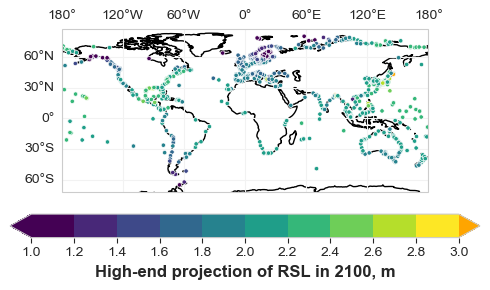

In [7]:
# Plot map showing high-end projection
fig, ax = d25a.fig_high_map(high_low='high')
_ = d25a.name_save_fig(fig, fso='f')

In [8]:
# Get country-level statisticas and show first few rows
country_stats_df = d25a.get_country_stats_df(rsl_novlm='rsl')
country_stats_df.head()

,country,count,high_med,high_min,high_max,low_med,low_min,low_max
0,AMERICAN SAMOA,1,2.344941,2.344941,2.344941,0.353471,0.353471,0.353471
1,ANTARCTICA,2,1.160015,1.115853,1.204176,-0.834162,-1.277176,-0.391147
2,ARGENTINA,7,1.814382,1.301029,1.855000,0.164412,-0.059206,0.212706
3,AUSTRALIA,73,2.030000,1.812059,2.118235,0.214029,0.000176,0.286882
4,BANGLADESH,4,2.121618,1.938471,2.524676,0.202324,0.012324,0.609324


Written fig03.pdf (0.03 MB)
Written fig03.png (0.38 MB)


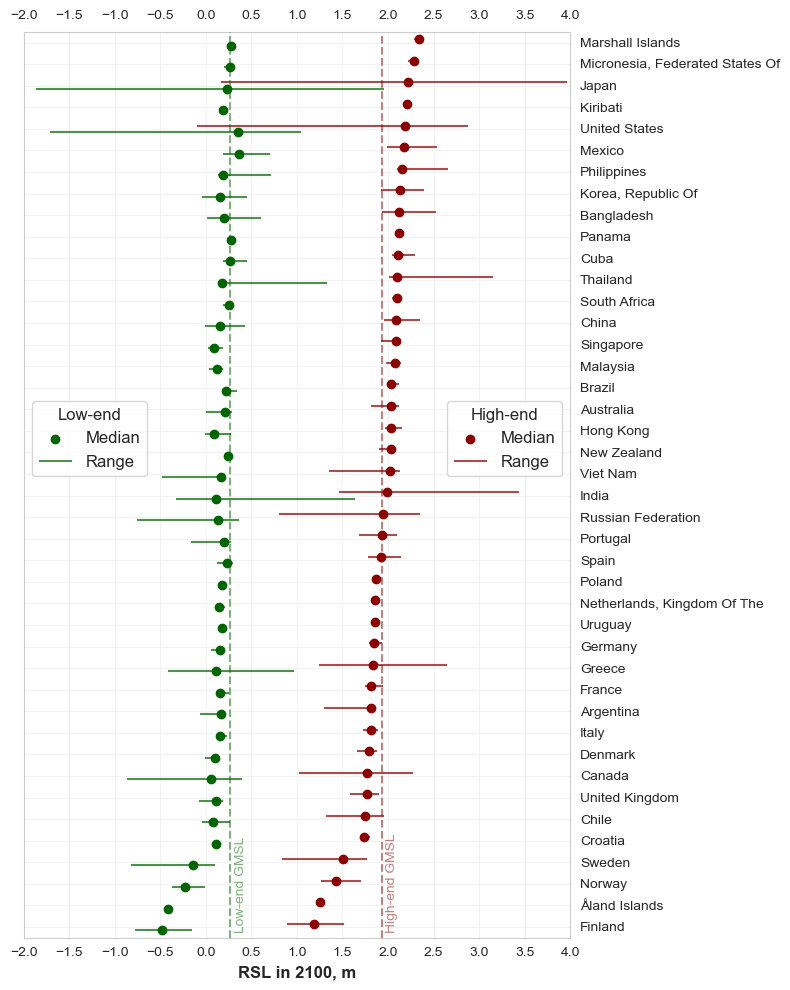

In [9]:
# Plot country-level median, min, and max of high-end and low-end projections for 2100
fig, axs = d25a.fig_country_stats(rsl_novlm='rsl', min_count=4)
_ = d25a.name_save_fig(fig, fso='f')

Written s02.pdf (0.03 MB)
Written s02.png (0.24 MB)


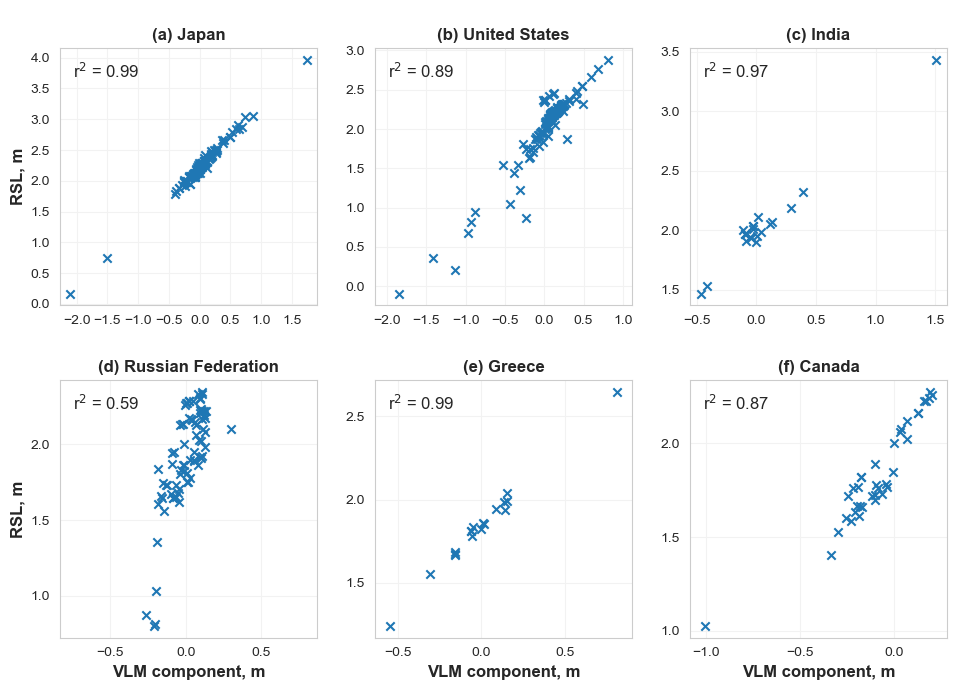

In [10]:
# Plot RSL vs VLM component of high-end projections for countries with the largest RSL ranges.
fig, axs = d25a.fig_rsl_vs_vlm()
_ = d25a.name_save_fig(fig, fso='s')

Written fig04.pdf (0.02 MB)
Written fig04.png (0.10 MB)


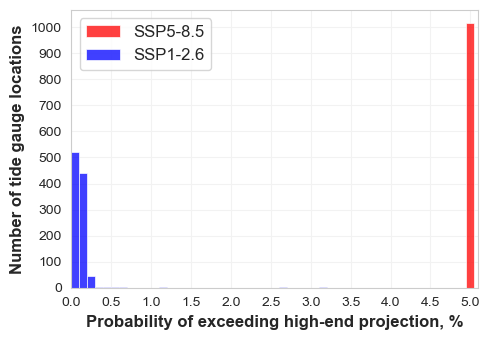

In [11]:
# Plot histogram showing probability of exceeding high-end projection at tide gauge locations
fig, ax = d25a.fig_p_exceed()
_ = d25a.name_save_fig(fig, fso='f')

In [12]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2025-01-07 14:22:20
End:       2025-01-07 14:22:27
Wall time: 7 s
